In [0]:
#!pip install kaggle

In [0]:
#from google.colab import drive

#drive.mount('/content/gdrive')
#root_path = 'gdrive/My Drive/titanic_data/'


In [0]:
#pwd

In [0]:
#from google.colab import files
#files.upload()

In [0]:
#!mkdir -p ~/.kaggle
#!cp kaggle.json ~/.kaggle/

In [0]:
#!chmod 600 ~/.kaggle/kaggle.json

In [0]:
#!kaggle competitions download -c titanic -p /content/gdrive/My\ Drive/titanic_data

In [7]:
 import numpy as np
 import pandas as pd
 
 import matplotlib as plt
 import seaborn as sns
 % matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
train=pd.read_csv('/content/drive/My Drive/titanic_data/train.csv')

In [9]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
train.shape

(891, 12)

In [0]:
test=pd.read_csv('/content/drive/My Drive/titanic_data/test.csv')

In [12]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [13]:
test.shape

(418, 11)

In [0]:
data=train.append(test)

In [0]:
passenger_id=test['PassengerId']

In [0]:
#set index to passanger id
train.set_index(['PassengerId'],inplace=True)
test.set_index(['PassengerId'],inplace=True)


In [17]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [19]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [20]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [21]:
train.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [22]:
test.dtypes

Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [23]:
#cleaning data
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [24]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [0]:
import missingno as mn

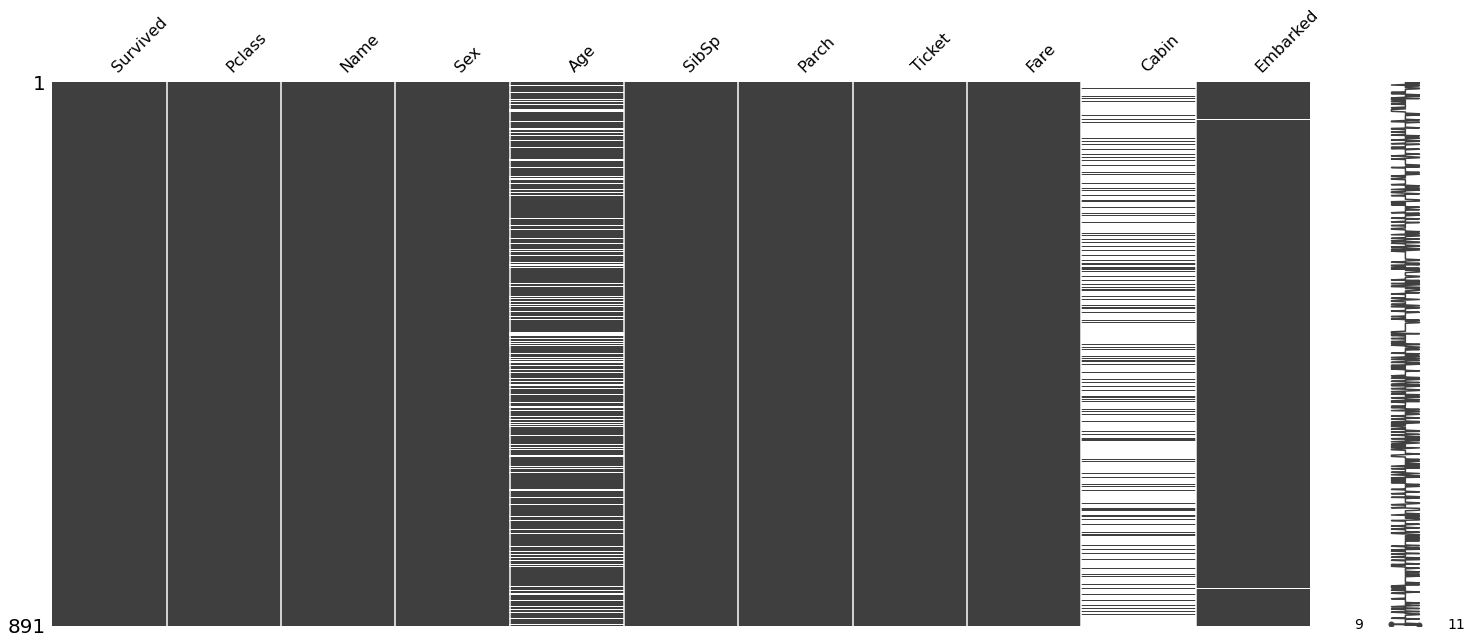

In [26]:
mn.matrix(train)

In [0]:
#lets fill these missing value
#from sklearn.impute import SimpleImputer
#imputer = SimpleImputer(missing_values=np.NaN, strategy='median',verbose=0)

In [0]:
#age2=imputer.fit_transform(train['Age'].values.reshape(1,-1))
#age2.shape

In [0]:
train["Age"].fillna( method ='ffill', inplace = True) 

In [0]:
test["Age"].fillna( method ='ffill', inplace = True)

In [0]:
train["Embarked"].fillna('S', inplace = True)

In [0]:
test.Fare.fillna(test.Fare.mean(),inplace=True)

In [33]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [34]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       327
Embarked      0
dtype: int64

In [0]:
train.drop('Cabin',axis=1,inplace=True)
test.drop('Cabin',axis=1,inplace=True)

In [36]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [0]:
train['Sex']=train.Sex.apply(lambda x:0 if x=='female' else 1)

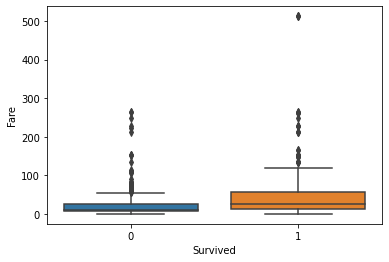

In [38]:
sns.boxplot(x='Survived',y='Fare',data=train)

In [0]:
train['Fare']=train[train['Fare']<=400]

In [40]:
train.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch
count,891.000000,891.000000,891.000000,891.00000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.58156,0.523008,0.381594
std,0.486592,0.836071,0.477990,14.55459,1.102743,0.806057
min,0.000000,1.000000,0.000000,0.42000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.00000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,28.00000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,38.00000,1.000000,0.000000
max,1.000000,3.000000,1.000000,80.00000,8.000000,6.000000


In [41]:
train.groupby('Survived').mean()

,Pclass,Sex,Age,SibSp,Parch
Survived,,,,,
0,2.531876,0.852459,30.33439,0.553734,0.329690
1,1.950292,0.318713,28.37307,0.473684,0.464912


In [42]:
train.groupby('Sex').mean()

,Survived,Pclass,Age,SibSp,Parch
Sex,,,,,
0,0.742038,2.159236,28.429682,0.694268,0.649682
1,0.188908,2.389948,30.208406,0.429809,0.235702


In [43]:
#correlation plot
train.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch
Survived,1.000000,-0.338481,-0.543351,-0.065571,-0.035322,0.081629
Pclass,-0.338481,1.000000,0.131900,-0.291157,0.083081,0.018443
Sex,-0.543351,0.131900,1.000000,0.058415,-0.114631,-0.245489
Age,-0.065571,-0.291157,0.058415,1.000000,-0.206104,-0.165191
SibSp,-0.035322,0.083081,-0.114631,-0.206104,1.000000,0.414838
Parch,0.081629,0.018443,-0.245489,-0.165191,0.414838,1.000000


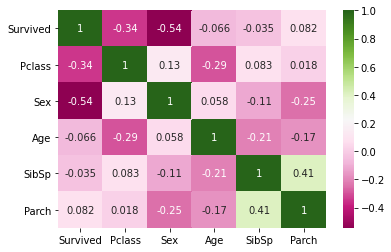

In [44]:
#plt.figure(figsize=(15,8))
sns.heatmap(train.corr(),annot=True,cmap='PiYG')

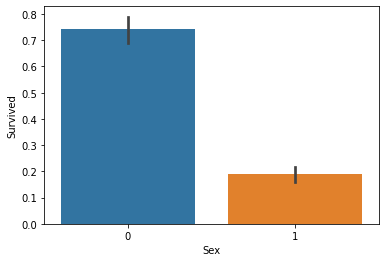

In [45]:
sns.barplot(x="Sex",y="Survived",data=train)

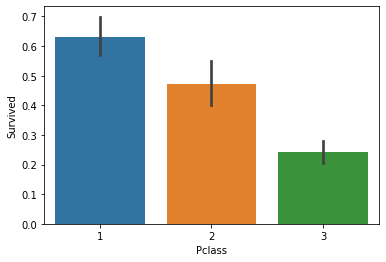

In [46]:
sns.barplot(x="Pclass",y="Survived",data=train)

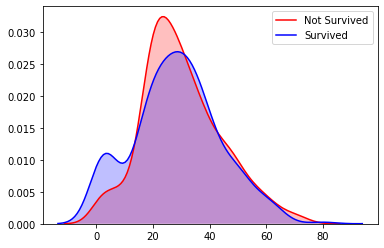

In [47]:
sns.kdeplot(train.loc[(train['Survived']==0),'Age'],color='r',shade=True,Label='Not Survived')
sns.kdeplot(train.loc[(train['Survived']==1),'Age'],color='b',shade=True,Label='Survived')

In [0]:
#feature engineering
train['family_size']=train['SibSp']+train['Parch']+1

In [0]:
def family_group(size):
  a=''
  if (size<=1):
    a='alone'
  elif (size<=4):
    a='small'
  else:
    a='large'
  return a

In [0]:
train['family_group']=train.family_size.map(family_group)

In [51]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size,family_group
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,0,S,2,small
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,1,C,2,small
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,1,S,1,alone
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,1,S,2,small
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,0,S,1,alone


In [0]:
def age_group(age):
  a=''
  if (age<=1):
    a='infant'
  elif (age<=4):
    a='toddler'
  elif (age<=14):
    a='child'
  elif (age<=15):
    a='teenager'
  elif (age<=25):
    a='young_adult'
  elif (age<=40):
    a='adult'
  elif (age<=55):
    a='middle_age'
  else:
    a='old'
  return a

In [0]:
train['age_group']=train['Age'].map(age_group)

In [54]:
train.age_group.value_counts()

adult          327
young_adult    272
middle_age     137
old             49
child           44
toddler         38
infant          18
teenager         6
Name: age_group, dtype: int64

In [0]:
train['fare_per_person']=train['Fare']/train['family_size']

In [0]:
def fare_group(fare):
  a=''
  if (fare<=4):
    a='very_low'
  elif (fare<=10):
    a='low'
  elif (fare<=20):
    a='mid'
  elif (fare<=45):
    a='high'
  else:
    a='very_high'
  return a

In [0]:
train['fare_group']=train.fare_per_person.map(fare_group)

In [61]:
train['fare_group'].value_counts()

very_low     888
very_high      3
Name: fare_group, dtype: int64

In [0]:
#creating dummy variable
train=pd.get_dummies(train,columns=['Embarked','family_group','age_group','fare_group'],drop_first=True)

In [63]:
train.shape

(891, 23)

In [0]:
#items=['Name','Ticket','Fare','Age','fare_per_person','family_size']
train.drop(['Name','Ticket','Fare','Age','fare_per_person','family_size'],axis=1,inplace=True)

In [79]:
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked_Q,Embarked_S,family_group_large,family_group_small,age_group_child,age_group_infant,age_group_middle_age,age_group_old,age_group_teenager,age_group_toddler,age_group_young_adult,fare_group_very_low
PassengerId,,,,,,,,,,,,,,,,,
1,0,3,1,1,0,0,1,0,1,0,0,0,0,0,0,1,1
2,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
3,1,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,1,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1
5,0,3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
